In [19]:
%matplotlib inline
%matplotlib widget

import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif', size = 18)

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

from fxpmath import Fxp

import funcs
import importlib
importlib.reload(funcs)  # Importing the latest version of funcs.py

<module 'funcs' from '/home/urosminoski/Desktop/FAKS/MASTER/All-Digital-RF-Transmitter-in-FPGA-master-/sim/v1.4/python/jupyter/funcs.py'>

### Input signal

<class 'numpy.ndarray'>


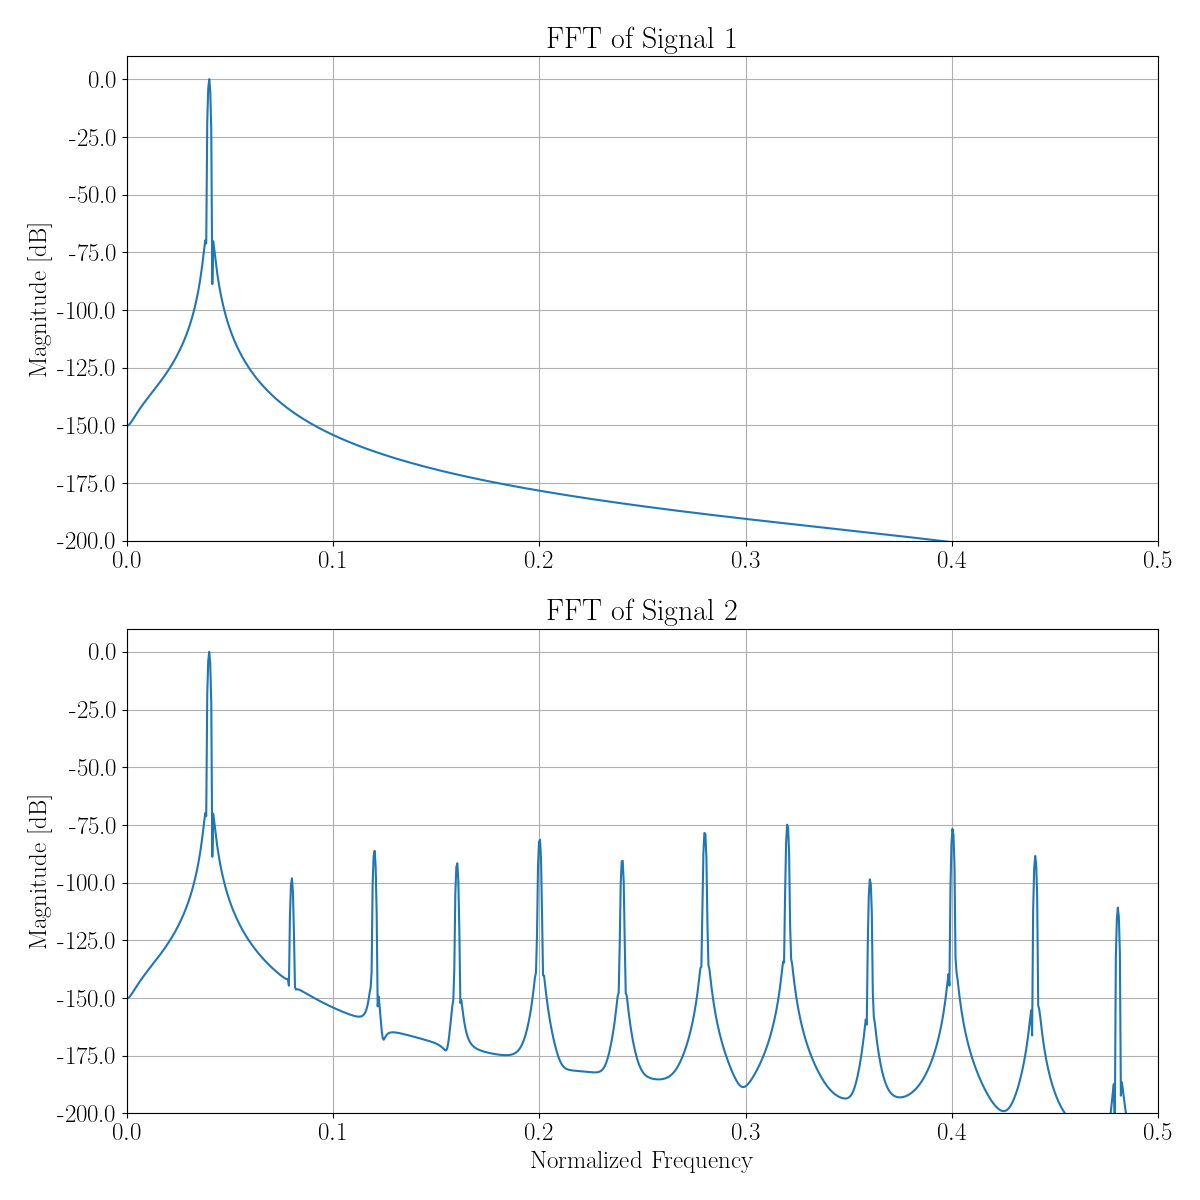

In [20]:
N = 2*1024
M = 3
OSR = 8

# x = 2**(M-1) * np.sin(2*np.pi*np.floor(2/7 * N/OSR) * np.arange(N)/N)
x = 2**(M-1) * np.sin(2*np.pi*0.32*np.arange(N)/OSR)
xfxp = [Fxp(val, signed=True, n_word=12, n_frac=8, overflow='saturate', rounding='around') for val in x]

xfxp_ = np.array([val() for val in xfxp])
print(type(xfxp_))

w = signal.blackman(len(x), False)
x_win = x*w
xfxp_win = xfxp_*w
funcs.plot_fft_dB(x_win, xfxp_win, ylim1=(-200, 10), ylim2=(-200, 10))

### Delta sigma modulation

In [21]:
yfxp = np.array([int(val) for val in funcs.deltaSigma(xfxp, n_word=4, n_frac=0)])

w = signal.blackman(len(yfxp), False)
yfxp_win = yfxp*w

max = 7, min = -7
Average = 0.00146484375


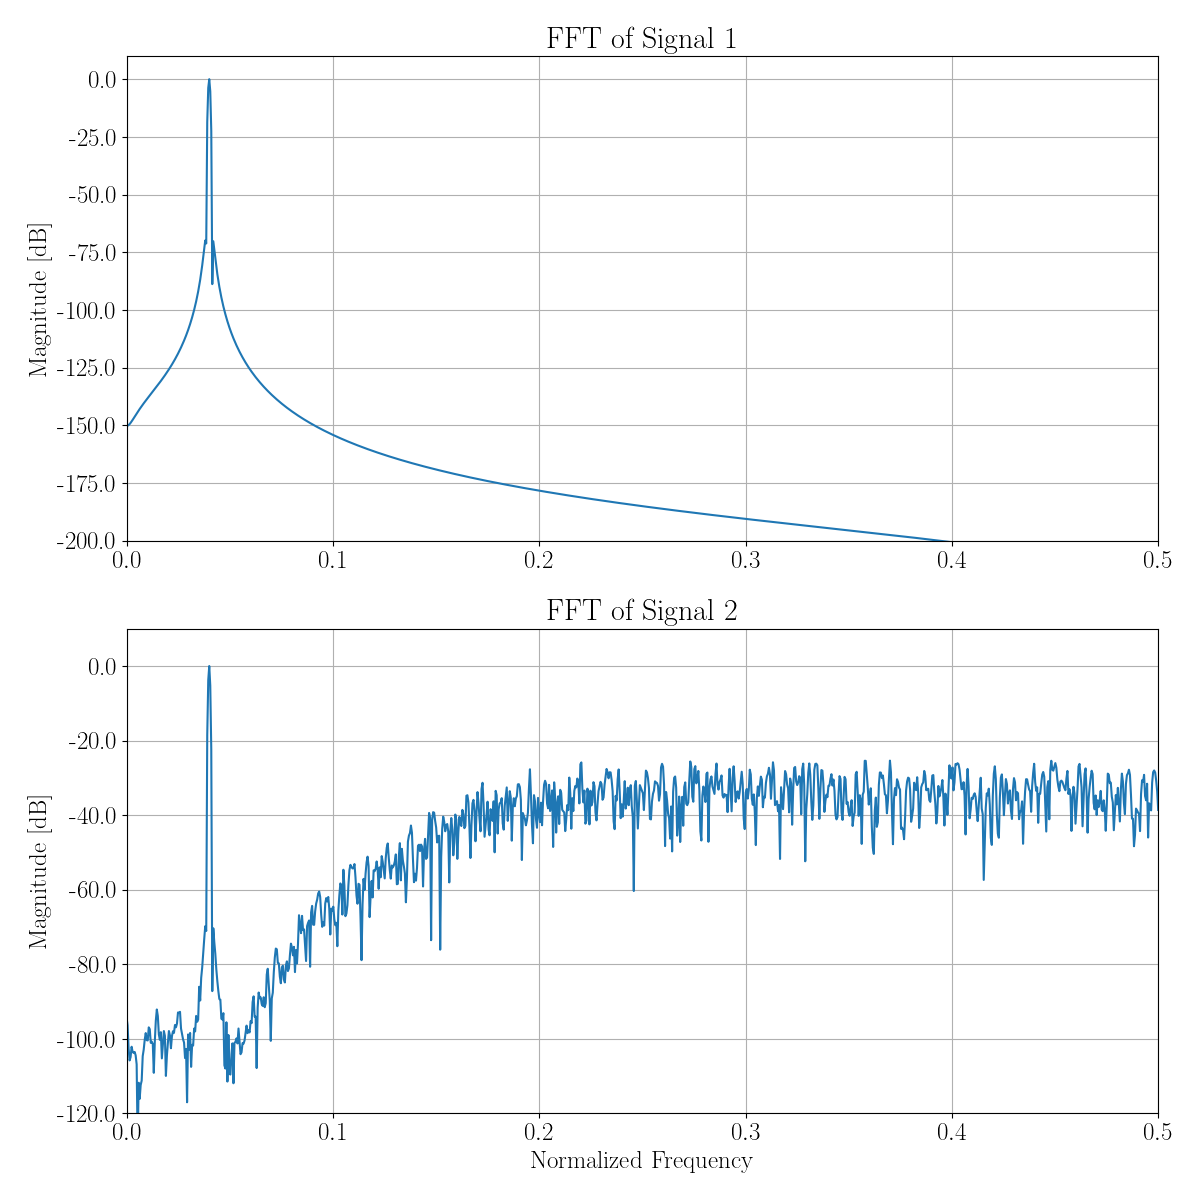

In [22]:
print(f"max = {np.max(yfxp)}, min = {np.min(yfxp)}")
print(f"Average = {np.sum(yfxp)/len(yfxp)}")

funcs.plot_fft_dB(x_win, yfxp_win, ylim1=(-200, 10), ylim2=(-120, 10))

### LUT 1

len(x) = 2048, len(y) = 32768
Ratio = 16
Average = 0.00018310546875


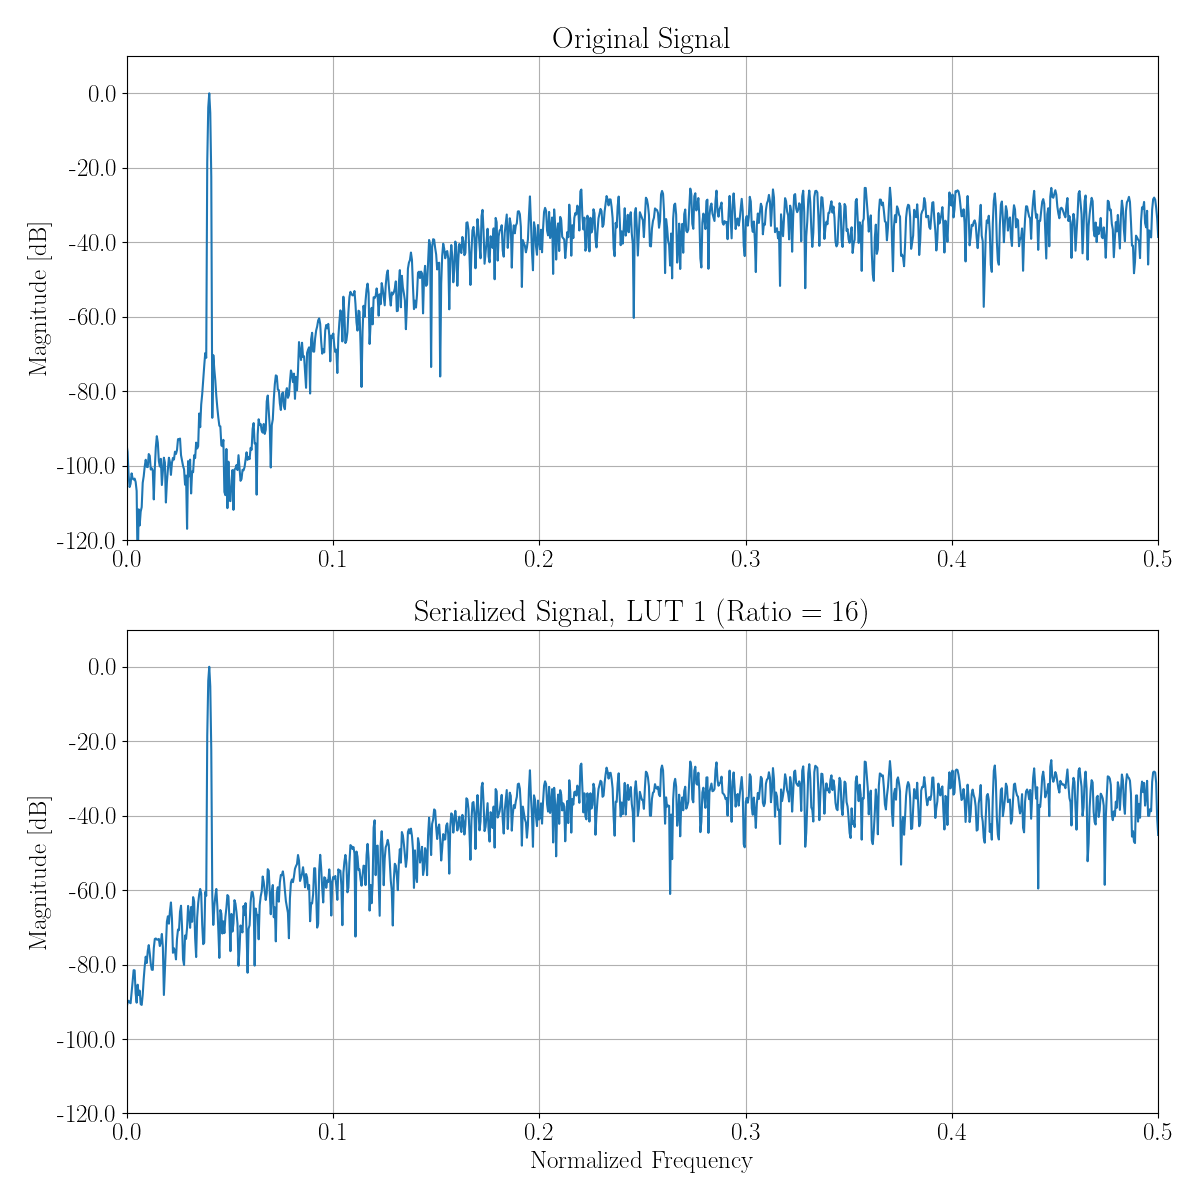

In [23]:
y1b = funcs.convert_1b(yfxp, funcs.LUT1)

w = signal.blackman(len(y1b), False)
y1b_win = y1b*w

print(f"len(x) = {len(yfxp)}, len(y) = {len(y1b)}")
print(f"Ratio = {int(len(y1b)/len(yfxp))}")
print(f"Average = {np.sum(y1b)/len(y1b)}")

funcs.plot_fft_dB(yfxp_win, y1b_win, ylim1=(-120, 10), ylim2=(-120, 10), title1="Original Signal", title2=f"Serialized Signal, LUT 1 (Ratio = {int(len(y1b)/len(yfxp))})")

### LUT 2

len(x) = 2048, len(y) = 65536
Ratio = 32
Average = 0.00018310546875


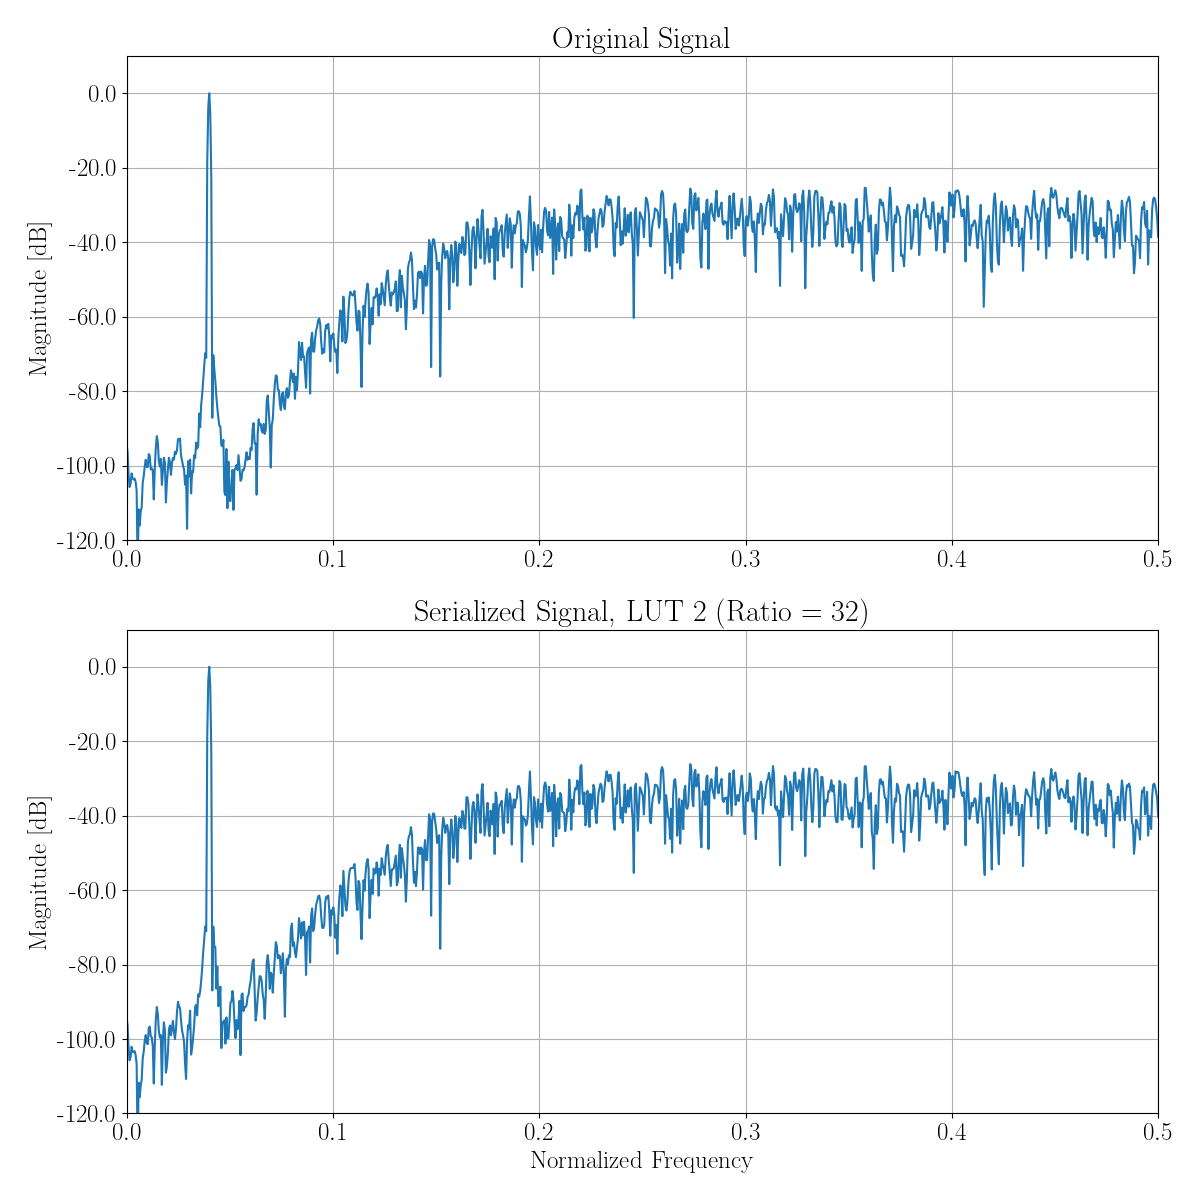

In [24]:
y1b = funcs.convert_1b(yfxp, funcs.LUT2)

w = signal.blackman(len(y1b), False)
y1b_win = y1b*w

print(f"len(x) = {len(yfxp)}, len(y) = {len(y1b)}")
print(f"Ratio = {int(len(y1b)/len(yfxp))}")
print(f"Average = {np.sum(y1b)/len(y1b)}")

funcs.plot_fft_dB(yfxp_win, y1b_win, ylim1=(-120, 10), ylim2=(-120, 10), title1="Original Signal", title2=f"Serialized Signal, LUT 2 (Ratio = {int(len(y1b)/len(yfxp))})")

### LUT 3

len(x) = 2048, len(y) = 65536
Ratio = 32
Average = 0.00018310546875


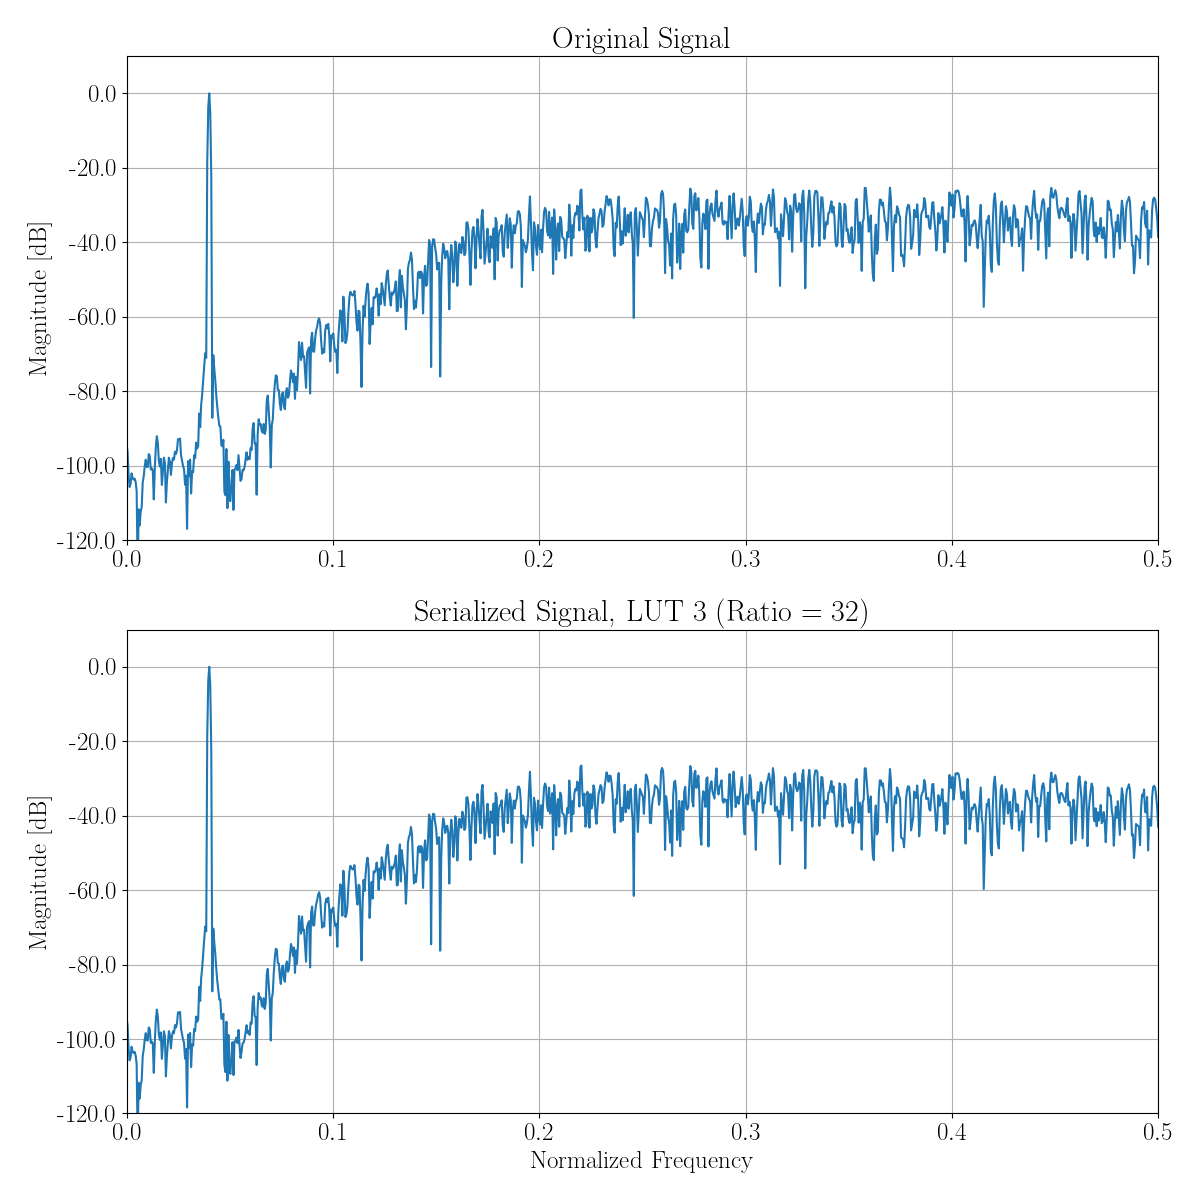

In [25]:
y1b = funcs.convert_1b(yfxp, funcs.LUT3)

w = signal.blackman(len(y1b), False)
y1b_win = y1b*w

print(f"len(x) = {len(yfxp)}, len(y) = {len(y1b)}")
print(f"Ratio = {int(len(y1b)/len(yfxp))}")
print(f"Average = {np.sum(y1b)/len(y1b)}")

funcs.plot_fft_dB(yfxp_win, y1b_win, ylim1=(-120, 10), ylim2=(-120, 10), title1="Original Signal", title2=f"Serialized Signal, LUT 3 (Ratio = {int(len(y1b)/len(yfxp))})")

### LUT 4

len(x) = 2048, len(y) = 30720
Ratio = 15
Average = 0.06686197916666667


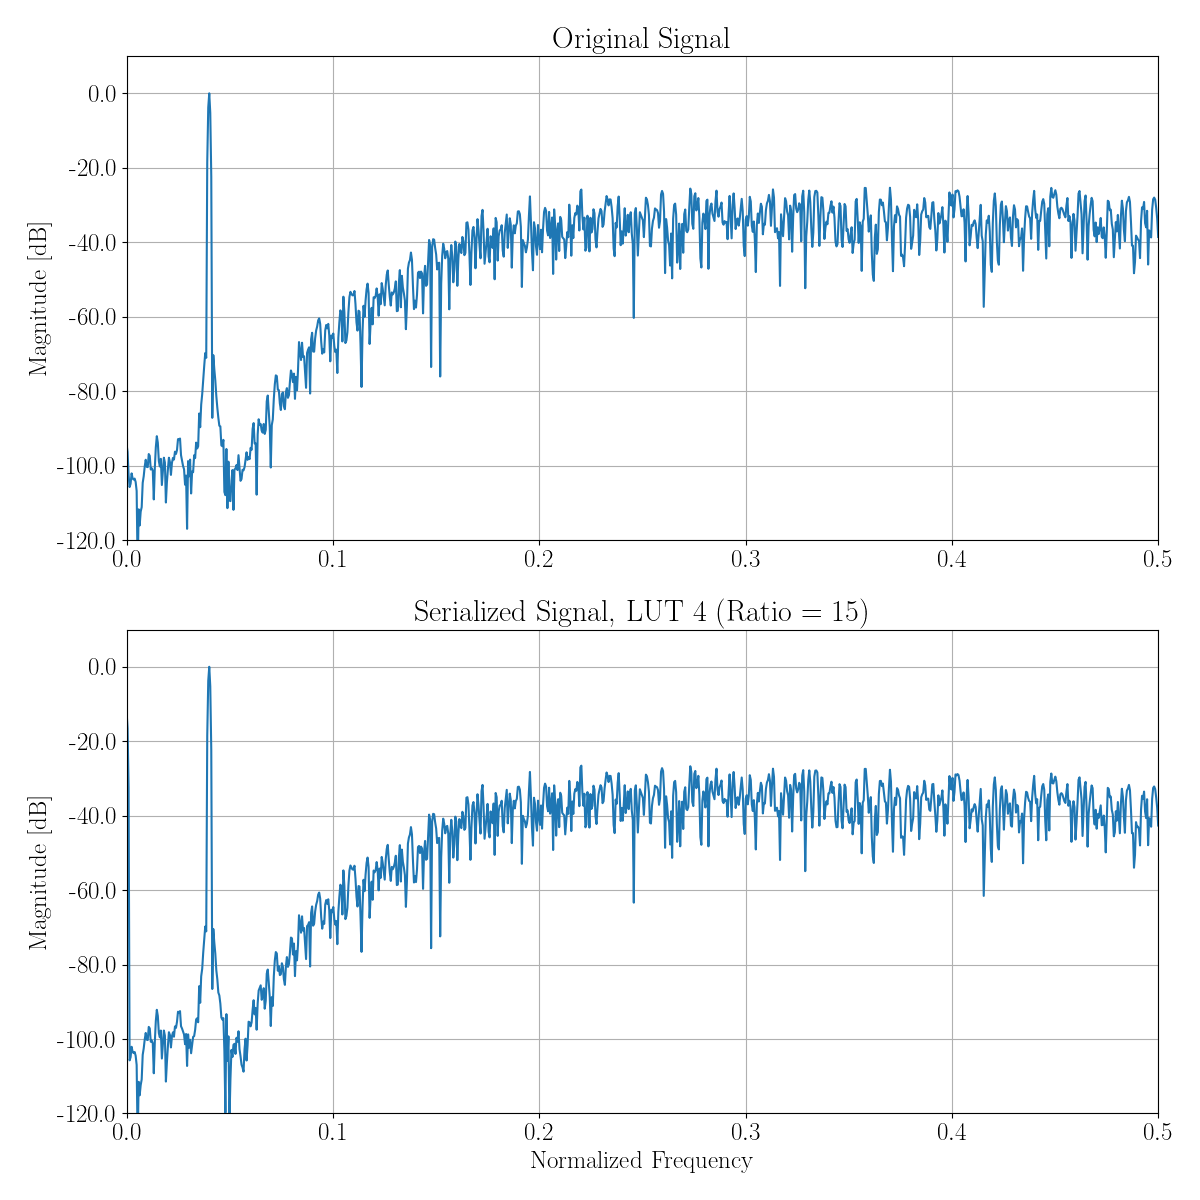

In [26]:
y1b = funcs.convert_1b(yfxp, funcs.LUT4)

w = signal.blackman(len(y1b), False)
y1b_win = y1b*w

print(f"len(x) = {len(yfxp)}, len(y) = {len(y1b)}")
print(f"Ratio = {int(len(y1b)/len(yfxp))}")
print(f"Average = {np.sum(y1b)/len(y1b)}")

funcs.plot_fft_dB(yfxp_win, y1b_win, ylim1=(-120, 10), ylim2=(-120, 10), title1="Original Signal", title2=f"Serialized Signal, LUT 4 (Ratio = {int(len(y1b)/len(yfxp))})")

### LUT 5

len(x) = 2048, len(y) = 38912
Ratio = 19
Average = 0.05278577302631579


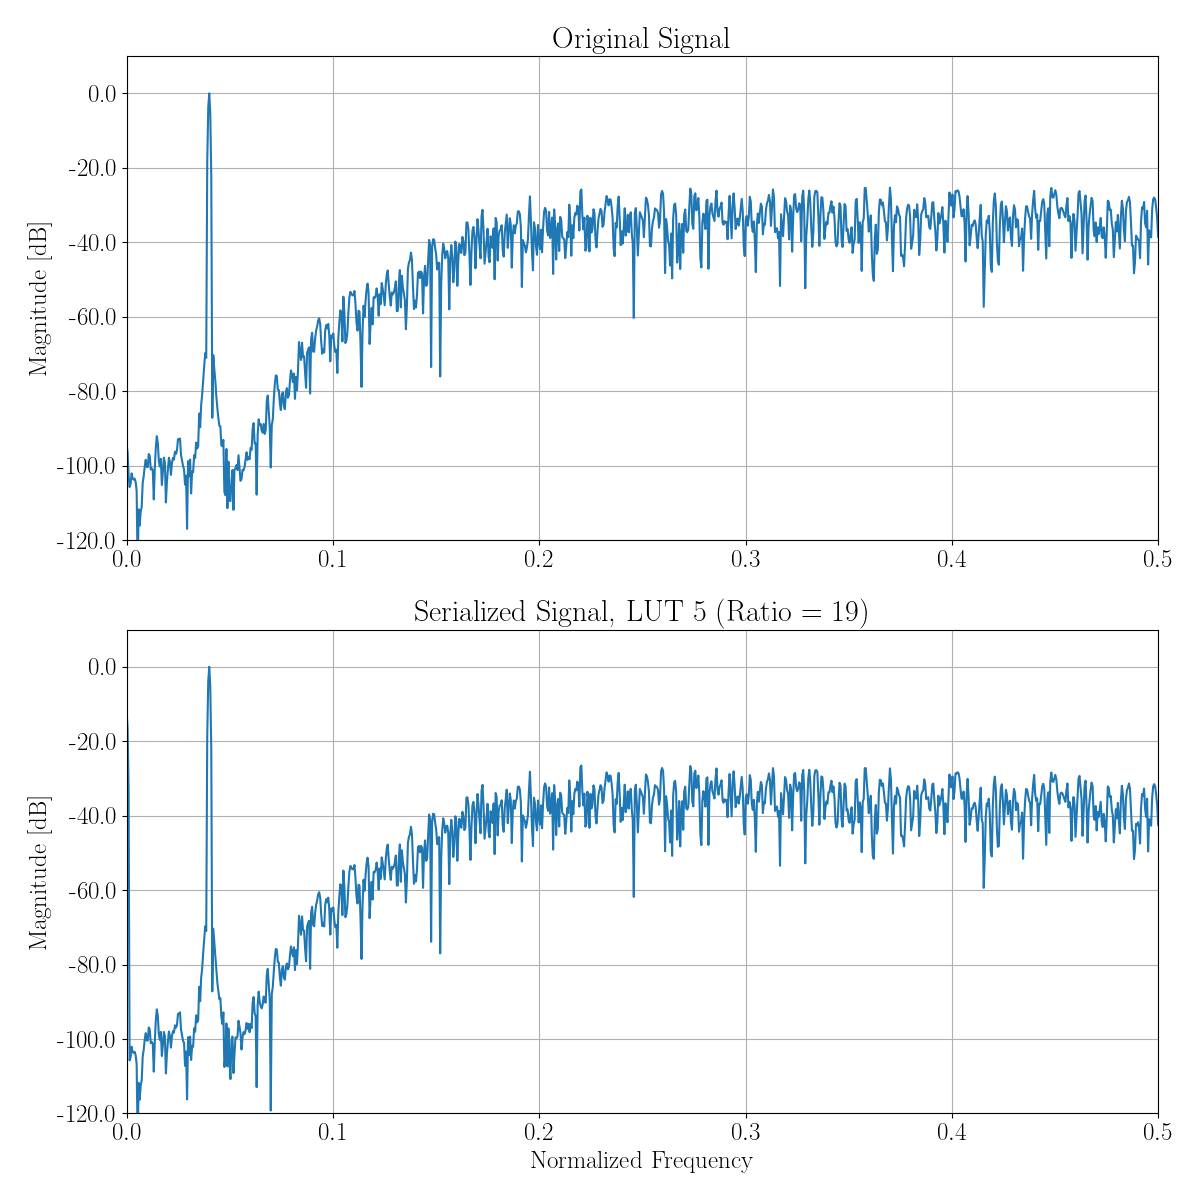

In [27]:
y1b = funcs.convert_1b(yfxp, funcs.LUT5)

w = signal.blackman(len(y1b), False)
y1b_win = y1b*w

print(f"len(x) = {len(yfxp)}, len(y) = {len(y1b)}")
print(f"Ratio = {int(len(y1b)/len(yfxp))}")
print(f"Average = {np.sum(y1b)/len(y1b)}")

funcs.plot_fft_dB(yfxp_win, y1b_win, ylim1=(-120, 10), ylim2=(-120, 10), title1="Original Signal", title2=f"Serialized Signal, LUT 5 (Ratio = {int(len(y1b)/len(yfxp))})")